In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the uber request data csv file into uber_request_data variable
uber_request_data=pd.read_csv("Uber Request Data.csv")

In [3]:
#Checking the dataframe
uber_request_data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [4]:
# Checking the shape of the dataframe
uber_request_data.shape

(6745, 6)

In [5]:
#Checking the information of dataframe 
uber_request_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [6]:
#Using describe function for analyising the dataframe
uber_request_data.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [7]:
#Calculaing the count of null values in the dataframe
uber_request_data.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [8]:
#Calculaing the percentages of null values in the dataframe
round(100*(uber_request_data.isnull().sum()/len(uber_request_data.index)),2)

Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64

In [9]:
#Adjusting the column names for convenience
uber_request_data.columns = uber_request_data.columns.str.strip().str.lower().str.replace(' ','_')
uber_request_data.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [10]:
#Creating a column named request_time from request_timestamp to standardize the format of the date and time 
uber_request_data['request_time']=uber_request_data['request_timestamp'].str.replace('/','-')
uber_request_data['request_time']=pd.to_datetime(uber_request_data['request_timestamp'],dayfirst=True)
uber_request_data.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_time
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16


In [11]:
#Creating a column named drop_time from drop_timestamp to standardize the format of the date and time
uber_request_data['drop_time']=uber_request_data['drop_timestamp'].replace('/','-')
uber_request_data['drop_time']=pd.to_datetime(uber_request_data['drop_timestamp'],dayfirst=True)
uber_request_data.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_time,drop_time
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47


In [12]:
# Extracting the hour in which the customer reqested for a cab from request_time into a column request_hour
uber_request_data['request_hour']=uber_request_data['request_time'].dt.hour
uber_request_data.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_time,drop_time,request_hour
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00,11
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00,17
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00,9
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00,21
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47,8


In [13]:
# Extracting the hour at which the customer was dropped from drop_time_time into a column drop_hour
uber_request_data['drop_hour']=uber_request_data['drop_time'].dt.hour
uber_request_data.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_time,drop_time,request_hour,drop_hour
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00,11,13.0
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00,17,18.0
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9.0
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00,21,22.0
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0


In [14]:
# Extracting the day on which the customer reqested for a cab from request_time into a column request_day
uber_request_data['request_day']=uber_request_data['request_time'].dt.day
uber_request_data.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_time,drop_time,request_hour,drop_hour,request_day
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00,11,13.0,11
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00,17,18.0,11
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9.0,12
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00,21,22.0,12
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0,13


In [15]:
# Extracting the day on at which the customer was dropped from drop_time into a column drop_day
uber_request_data['drop_day']=uber_request_data['drop_time'].dt.day
uber_request_data.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_time,drop_time,request_hour,drop_hour,request_day,drop_day
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00,11,13.0,11,11.0
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00,17,18.0,11,11.0
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9.0,12,12.0
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00,21,22.0,12,12.0
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0,13,13.0


C:\Users\Naga Sai Aditya\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


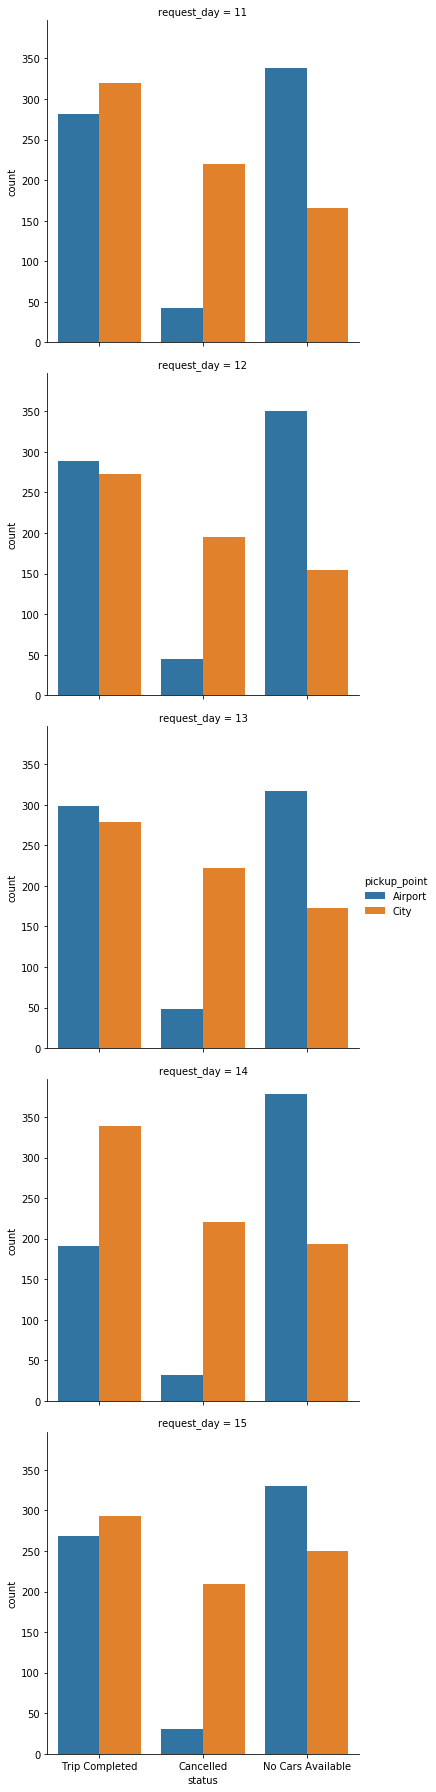

In [16]:
#Creating a plot showing number of requests filtered on status and pickup points day-wise
sns.factorplot(x='status',row='request_day',hue='pickup_point',data=uber_request_data,estimator=np.sum,kind='count')

C:\Users\Naga Sai Aditya\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


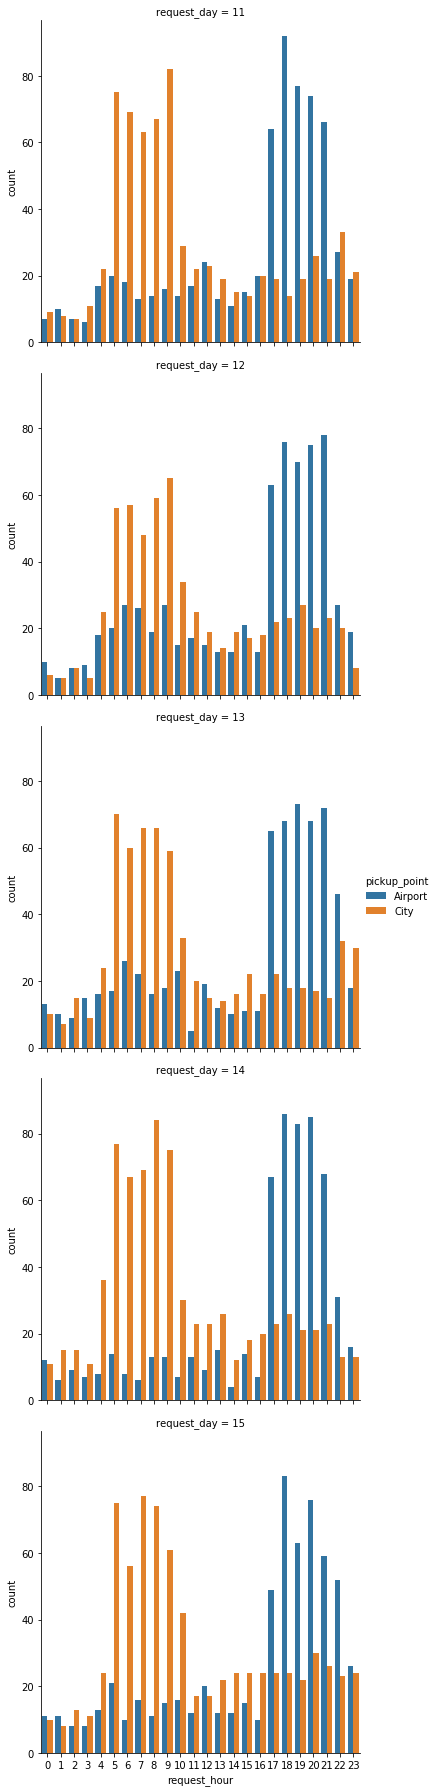

In [17]:
#Creating a plot showing number of requests filtered based on day and hour of request and also the pickup point
#All the below factor plots can be made as catplot as factorplot name is changed to catplot
#sns.catplot(x='request_hour',row='request_day',hue='pickup_point',data=uber_request_data,strip='count',estimator=np.sum)
#plt.show()

sns.factorplot(x='request_hour',row='request_day',hue='pickup_point',data=uber_request_data,kind='count',estimator=np.sum)
plt.show()

In [18]:
#Creating a column to find the counts in future analysis
uber_request_data['count']=1

C:\Users\Naga Sai Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


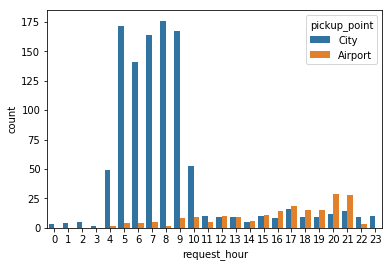

In [19]:
#Creating a plot showing number of request filtered on request hour with status as Cancelled
sns.barplot(x='request_hour',y='count',hue='pickup_point',data=uber_request_data[uber_request_data['status']=='Cancelled'],estimator=np.sum)

C:\Users\Naga Sai Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


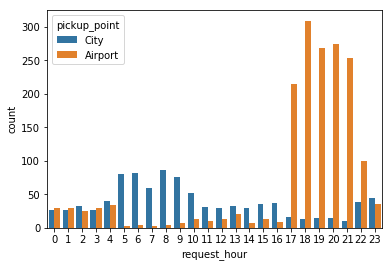

In [20]:
#Creating a plot showing number of request filtered on request hour with status as No Cars Available
sns.barplot(x='request_hour',y='count',hue='pickup_point',data=uber_request_data[uber_request_data['status']=='No Cars Available'],estimator=np.sum)

C:\Users\Naga Sai Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


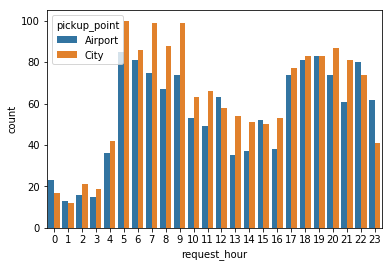

In [21]:
#Creating a plot showing number of request filtered on request hour with status as Trip Completed
sns.barplot(x='request_hour',y='count',hue='pickup_point',data=uber_request_data[uber_request_data['status']=='Trip Completed'],estimator=np.sum)

In [22]:
# Splitting the day into time periods as bins to identfy at what period the demand is more
uber_request_data['request_time_period']=pd.cut(uber_request_data['request_hour'],bins=[0,5,10,17,22,24],labels=['Early Morning','Morning','Noon','Evening','Night'])

C:\Users\Naga Sai Aditya\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


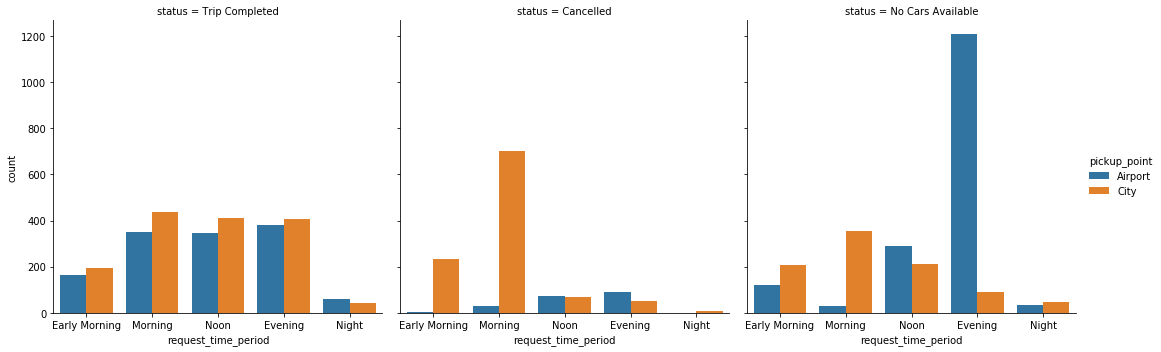

In [23]:
#Creating a plot showing number of requests filtered on status, requested time period and pickup points
sns.factorplot(x='request_time_period',col='status',hue='pickup_point',data=uber_request_data,estimator=np.sum, kind='count')

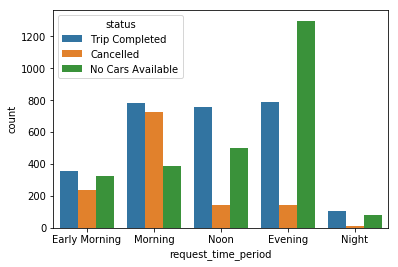

In [24]:
#Creating a plot showing number of requests filtered on status,requested time period and pickup points
sns.countplot(x='request_time_period',hue='status',data=uber_request_data)

In [25]:
# Demand on requested time period basis for Airport and City
uber_request_data.groupby(['pickup_point','request_time_period'])['request_id'].count()

pickup_point  request_time_period
Airport       Early Morning           292
              Morning                 409
              Noon                    711
              Evening                1675
              Night                    98
City          Early Morning           632
              Morning                1492
              Noon                    688
              Evening                 553
              Night                    96
Name: request_id, dtype: int64

In [26]:
# Supply on requested time period basis for Airport and City
uber_request_data.loc[uber_request_data['status']=='Trip Completed'].groupby(['pickup_point','request_time_period'])['request_id'].count()

pickup_point  request_time_period
Airport       Early Morning          165
              Morning                350
              Noon                   348
              Evening                379
              Night                   62
City          Early Morning          194
              Morning                435
              Noon                   409
              Evening                408
              Night                   41
Name: request_id, dtype: int64

In [27]:
# Gap on requested time period basis for Airport and City
uber_request_data[(uber_request_data['status']=='Trip Completed') | (uber_request_data['status']=='No Cars Available')].groupby(['pickup_point','request_time_period'])['request_id'].count()

pickup_point  request_time_period
Airport       Early Morning           286
              Morning                 381
              Noon                    637
              Evening                1585
              Night                    98
City          Early Morning           400
              Morning                 791
              Noon                    621
              Evening                 500
              Night                    86
Name: request_id, dtype: int64

C:\Users\Naga Sai Aditya\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Naga Sai Aditya\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Naga Sai Aditya\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Naga Sai Aditya\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size

Text(0.5,1,'Gap in City and Airport')

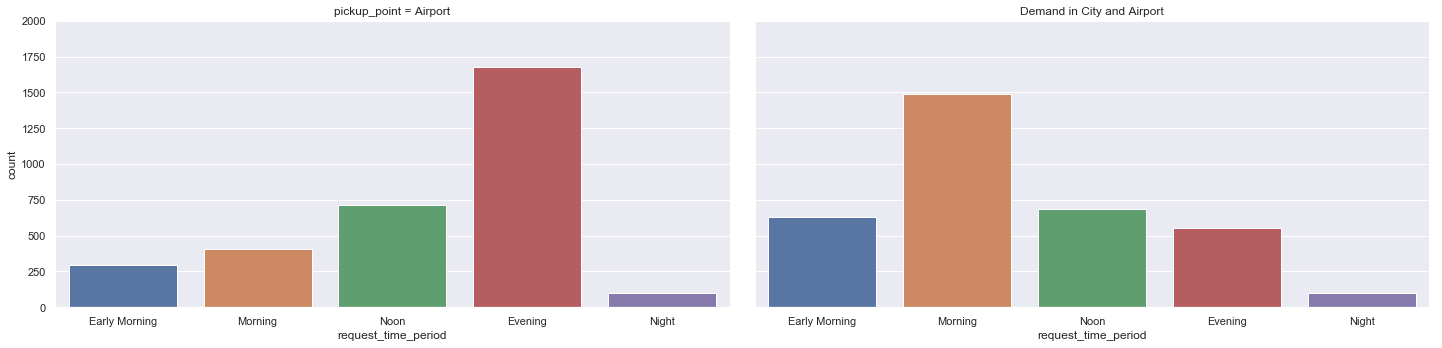

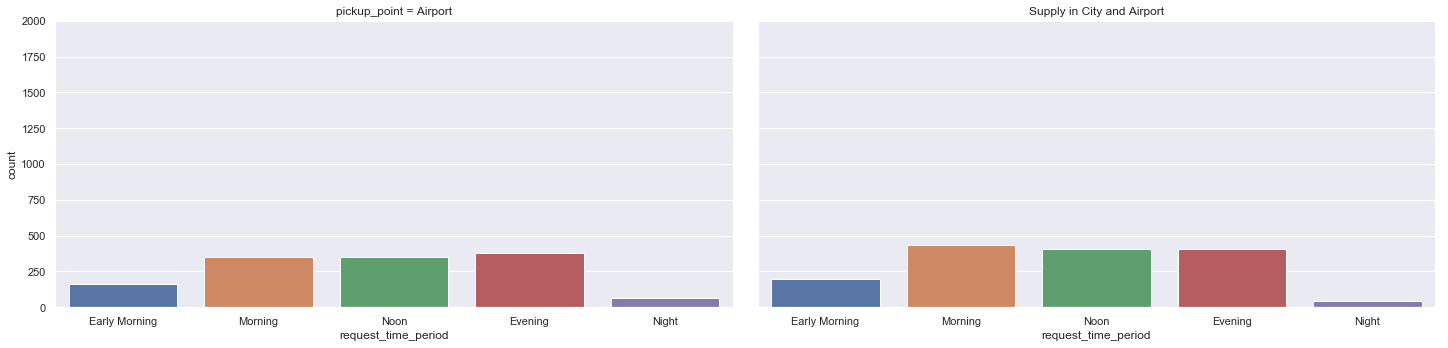

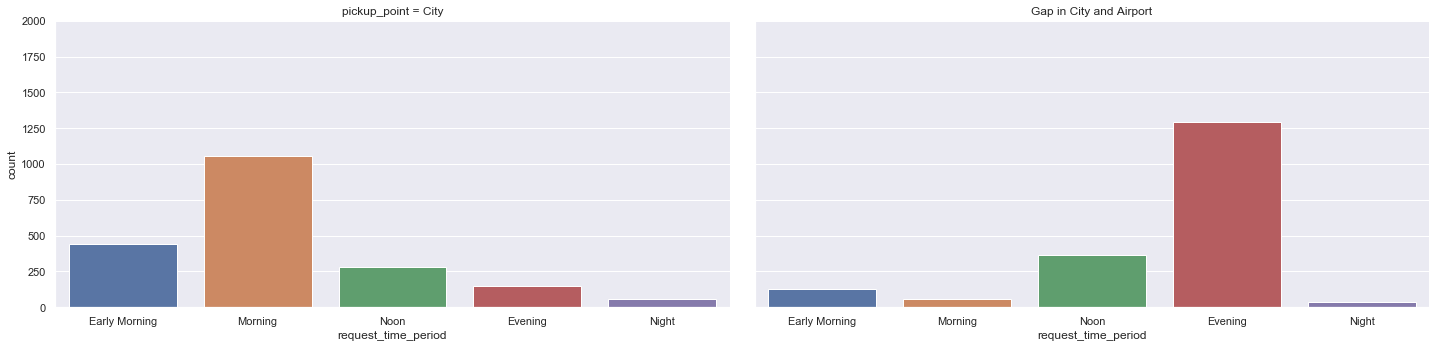

In [31]:
#Creating plots depecting the demand supply gap in city and airports 
sns.set(style="darkgrid")
sns.factorplot(x="request_time_period", col="pickup_point",data=uber_request_data, kind="count",size=5, aspect=2).set(ylim=(0, 2000))
plt.title("Demand in the City and Airport")
sns.factorplot(x="request_time_period", col="pickup_point",data=uber_request_data[uber_request_data['status']=='Trip Completed'],kind="count",size=5, aspect=2).set(ylim=(0, 2000))
plt.title("Supply in the City and Airport")
sns.factorplot(x="request_time_period", col="pickup_point",data=uber_request_data[(uber_request_data['status']=='Cancelled')| (uber_request_data['status']=='No Cars Available')],kind="count",size=5, aspect=2).set(ylim=(0, 2000))
plt.title("Gap in the City and Airport")

In [29]:
#uber_request_data.to_csv('modified_uber_request_data.csv', sep=',', encoding='utf-8', header = True, index = False)

PermissionError: [Errno 13] Permission denied: 'modified_uber_request_data.csv'